# Load csv files, guage and video

In [2]:
in_guage_data_slow = csvread("x_friction_slow.csv");
in_guage_data_fast = csvread("x_friction_fast.csv");

guage_data_slow.Var1 = in_guage_data_slow(:,1);
guage_data_slow.Var2 = in_guage_data_slow(:,2);

guage_data_fast.Var1 = in_guage_data_fast(:,1);
guage_data_fast.Var2 = in_guage_data_fast(:,2);

in_video_data_fast = csvread("x_friction_fast_video.csv");
in_video_data_slow = csvread("x_friction_slow_video.csv");

video_data_fast.t = in_video_data_fast(:,1);
video_data_fast.x = in_video_data_fast(:,2);
video_data_fast.y = in_video_data_fast(:,3);

video_data_slow.t = in_video_data_slow(:,1);
video_data_slow.x = in_video_data_slow(:,2);
video_data_slow.y = in_video_data_slow(:,3);

% It turns out friction can vary depending on speed, both increasing and
% decreasing. Depends on the material properties, and for decreasing speeds
% it might be due to a phenomenon called stick-slip, where the surfaces are
% quickly switching between static and dynamic friction.

% "Stick-slip phenomena are associated with a decrease in the COF as the sliding
% speed increases. The transition from static to sliding friction also can be
% regarded as a case where the COF decreases as sliding speed increases."

% http://www.physics.usyd.edu.au/~cross/PUBLICATIONS/30.%20FrictionvsSpeed.pdf

# Plot of raw data and filtered data

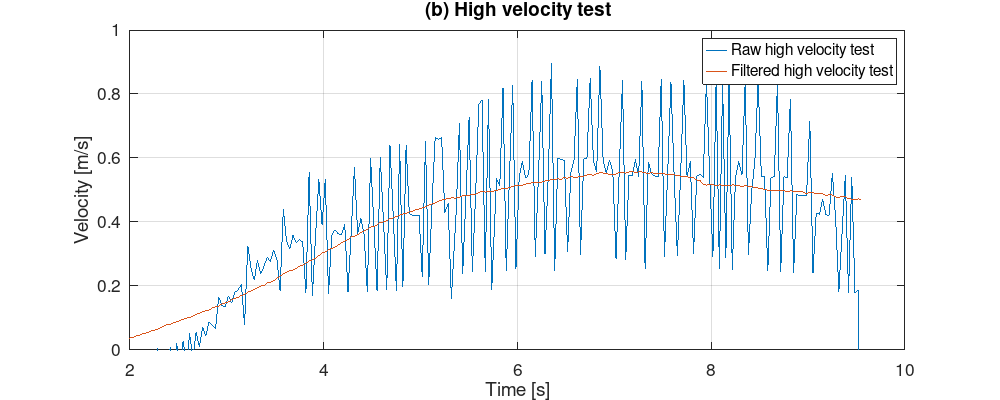

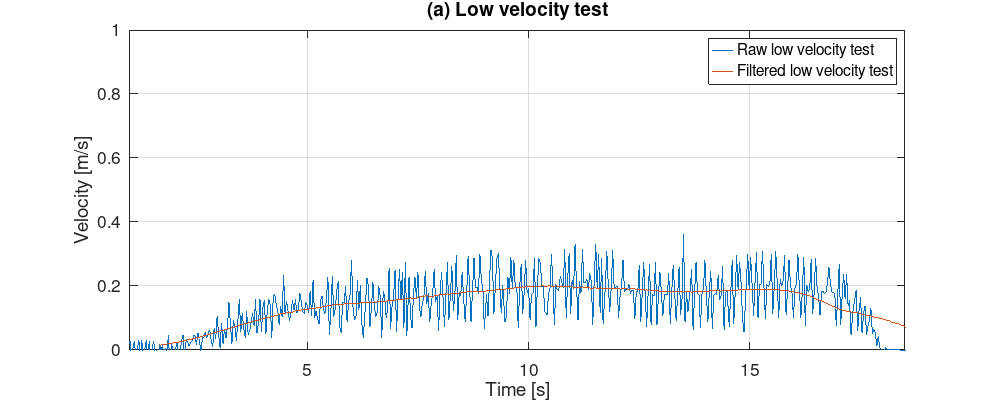

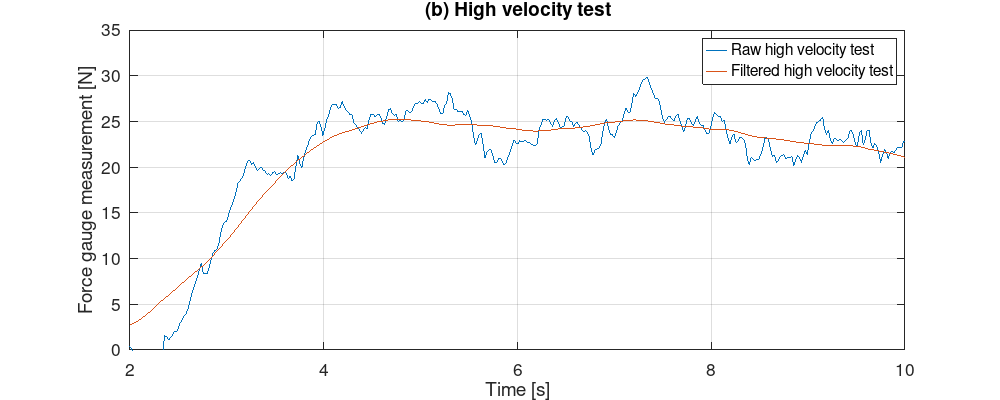

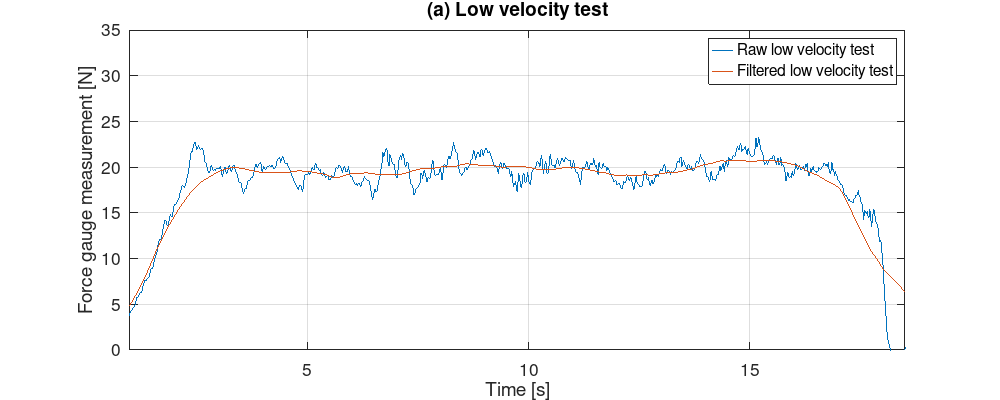

In [3]:
% SLOW gauge
guage_data_slow_time = guage_data_slow.Var1-14;
guage_data_slow_force = guage_data_slow.Var2*9.82;

% SLOW velocity
video_slow_pos = sqrt(video_data_slow.x.^2 + video_data_slow.y.^2);
video_slow_vel = diff(video_slow_pos)./diff(video_data_slow.t);
video_slow_time = video_data_slow.t(1:length(video_data_slow.t)-1,1);

% FAST gauge
guage_data_fast_time = guage_data_fast.Var1-3;
guage_data_fast_force = guage_data_fast.Var2*9.82;

% FAST velocity
video_fast_pos = sqrt(video_data_fast.x.^2 + video_data_fast.y.^2);
video_fast_vel = diff(video_fast_pos)./diff(video_data_fast.t);
video_fast_time = video_data_fast.t(1:length(video_data_fast.t)-1,1);

close all

figure('position',[1550,700,1000,400])
plot(guage_data_slow_time, guage_data_slow_force,guage_data_slow_time, movmean(guage_data_slow_force,100))
grid on
xlim([1 18.5])
ylim([0 35])
title("(a) Low velocity test")
xlabel("Time [s]")
ylabel("Force gauge measurement [N]")
legend("Raw low velocity test","Filtered low velocity test")

figure('position',[1550,700,1000,400])
plot(guage_data_fast_time, guage_data_fast_force,guage_data_fast_time, movmean(guage_data_fast_force,100))
grid on
xlim([2 10])
ylim([0 35])
title("(b) High velocity test")
xlabel("Time [s]")
ylabel("Force gauge measurement [N]")
legend("Raw high velocity test","Filtered high velocity test")

% exportgraphics(gcf,"friction_coeffecient_x_axis.pdf","ContentType","vector")

figure('position',[1550,200,1000,400])
plot(video_slow_time, video_slow_vel,video_slow_time, movmean(video_slow_vel,100))
grid on
xlim([1 18.5])
ylim([0 1])
title("(a) Low velocity test")
xlabel("Time [s]")
ylabel("Velocity [m/s]")
legend("Raw low velocity test","Filtered low velocity test")

figure('position',[1550,200,1000,400])
plot(video_fast_time, video_fast_vel,video_fast_time, movmean(video_fast_vel,100))
grid on
xlim([2 10])
ylim([0 1])
title("(b) High velocity test")
xlabel("Time [s]")
ylabel("Velocity [m/s]")
legend("Raw high velocity test","Filtered high velocity test")

# exportgraphics(figure(1),"raw_force_data.pdf","ContentType","vector")
# exportgraphics(figure(2),"raw_velociy_data.pdf","ContentType","vector")

# Interpolation of data

In [11]:
slow_interp_time = 0:0.01:18;

% Guage
guage_data_slow_time = guage_data_slow.Var1-14;
guage_data_slow_force = movmean(guage_data_slow.Var2,100)*9.82;

slow_force_interp = interp1(guage_data_slow_time.+(rand(1,length(guage_data_slow_time)).*0.001)',guage_data_slow_force,slow_interp_time);

% Video
video_slow_pos = sqrt(video_data_slow.x.^2 + video_data_slow.y.^2);
video_slow_vel = diff(video_slow_pos)./diff(video_data_slow.t);
video_slow_time = video_data_slow.t(1:length(video_data_slow.t)-1,1);

slow_vel_interp = interp1(video_slow_time.+(rand(1,length(video_slow_time)).*0.001)',movmean(video_slow_vel,100),slow_interp_time);

% Calculate friction as b = f/vel
slow_fric = slow_force_interp./slow_vel_interp;

fast_interp_time = 0:0.01:18;

% Guage
guage_data_fast_time = guage_data_fast.Var1-3;
guage_data_fast_force = movmean(guage_data_fast.Var2,100)*9.82;

fast_force_interp = interp1(guage_data_fast_time.+(rand(1,length(guage_data_fast_time)).*0.001)',guage_data_fast_force,fast_interp_time);

% Video
video_fast_pos = sqrt(video_data_fast.x.^2 + video_data_fast.y.^2);
video_fast_vel = diff(video_fast_pos)./diff(video_data_fast.t);
video_fast_time = video_data_fast.t(1:length(video_data_fast.t)-1,1);

fast_vel_interp = interp1(video_fast_time.+(rand(1,length(video_fast_time)).*0.001)',movmean(video_fast_vel,100),fast_interp_time);

% Calculate friction as b = f/vel
fast_fric = fast_force_interp./fast_vel_interp;


# Least squares determination of friction constants

dampB = 13.512
minFBs = 17.400


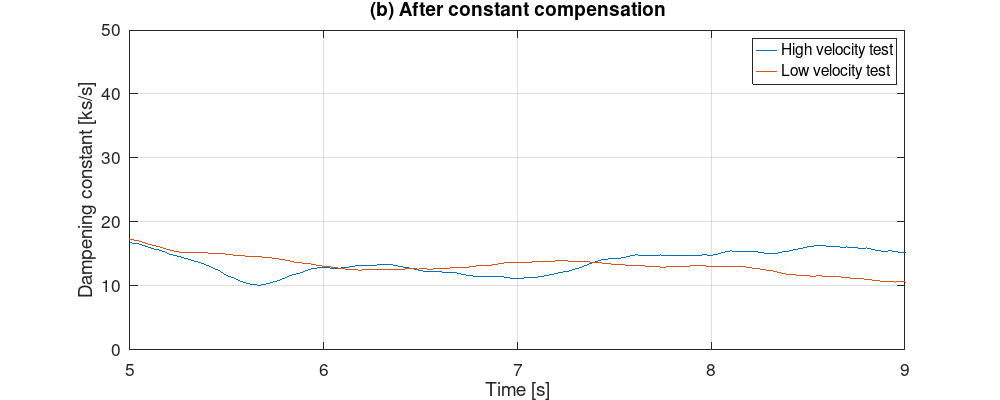

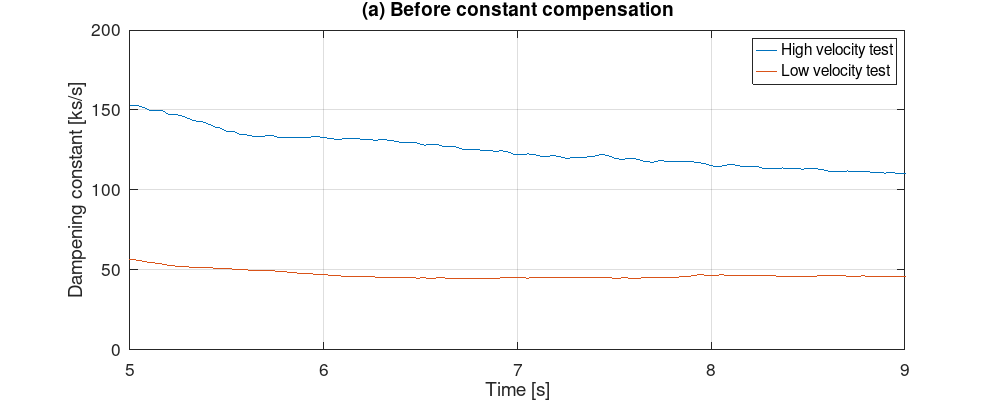

In [18]:
%% Plot of non-compensated and compensated dampening

close all

slow_fric = ((slow_force_interp)./slow_vel_interp);
fast_fric = ((fast_force_interp)./fast_vel_interp);

figure('position',[0,0,1000,400])

plot(slow_interp_time, slow_fric)
hold on
grid on
plot(fast_interp_time, fast_fric)
xlim([5 9])
ylim([0 200])
title("(a) Before constant compensation")
xlabel("Time [s]")  
ylabel("Dampening constant [ks/s]")
legend("High velocity test","Low velocity test")

% Initialized with higher values
FBs = 100;
minFBs = 1000;
leastsquare = 1000;

% Optimized for the lowest squared error when calculating FBs
for i=10:0.1:20
    FBs = i;

    slow_fric = ((slow_force_interp-FBs)./slow_vel_interp);
    fast_fric = ((fast_force_interp-FBs)./fast_vel_interp);

    mvmnslow = movmean(slow_fric,100);
    mvmnfast = movmean(fast_fric,100);
    
    squarederror = sum((mvmnslow(500:900)-mvmnfast(500:900)).^2)/length(mvmnslow(500:900));
    if squarederror < leastsquare
        leastsquare = squarederror;
        minFBs = i;
    end

    if i == 20
        slow_fric = ((slow_force_interp-minFBs)./slow_vel_interp);
        fast_fric = ((fast_force_interp-minFBs)./fast_vel_interp);
        mvmnslow = movmean(slow_fric,100);
        mvmnfast = movmean(fast_fric,100);
        dampB = (sum(mvmnslow(500:900))+sum(mvmnfast(500:900)))/(length(mvmnfast(500:900))*2);

    end

end

dampB
minFBs

slow_fric = ((slow_force_interp-minFBs)./slow_vel_interp);
fast_fric = ((fast_force_interp-minFBs)./fast_vel_interp);

figure('position',[0,0,1000,400])
plot(slow_interp_time,slow_fric)
hold on
grid on
plot(fast_interp_time,fast_fric)
xlim([5 9])
ylim([0 50])
title("(b) After constant compensation")
xlabel("Time [s]")
ylabel("Dampening constant [ks/s]")
legend("High velocity test","Low velocity test")

# exportgraphics(gcf,"friction_coeffecient_x_axis.pdf","ContentType","vector")
